In [1]:
#importing dependencies
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import metrics



In [2]:
#Importing ML model, evaluation matrics and GridsearchCV for optimization
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib
from sklearn.model_selection import GridSearchCV

Loading Dataset

In [3]:
#Loading the dataset to pandas
all_data = pd.read_csv('all_data.csv')

In [4]:
type(all_data)

pandas.core.frame.DataFrame

In [5]:
#First 10 rows of the dataframe
all_data.head(10)

N      P     K    PH    Ca    Mg  RAINFALL  TEMPERATURE  HUMIDITY  \
0  1.83  10.64  0.15  5.79  3.14  0.57    311.59        30.20     83.08   
1  1.91  11.59  0.15  5.84  3.04  0.58    240.58        27.14     83.25   
2  1.86   9.80  0.15  5.53  3.08  0.58    271.78        25.64     80.67   
3  1.80  13.81  0.16  5.62  3.07  0.60    330.54        29.39     80.08   
4  1.73  14.02  0.17  5.89  2.95  0.58    304.07        29.91     84.95   
5  1.74  13.37  0.15  5.86  3.16  0.58    266.06        25.17     83.78   
6  1.73   9.96  0.15  5.63  3.15  0.60    263.88        31.48     80.51   
7  1.92  11.16  0.18  5.55  3.23  0.57    341.37        30.56     86.99   
8  1.49  13.07  0.17  5.92  3.16  0.56    350.31        27.56     85.94   
9  1.44  13.07  0.14  5.54  3.07  0.57    271.76        27.17     81.48   

         LABEL  
0  Bambara Nut  
1  Bambara Nut  
2  Bambara Nut  
3  Bambara Nut  
4  Bambara Nut  
5  Bambara Nut  
6  Bambara Nut  
7  Bambara Nut  
8  Bambara Nut  
9  Bambara Nut

In [6]:
#Last 5 rows of the dataframe
all_data.tail()

N      P     K    PH    Ca    Mg  RAINFALL  TEMPERATURE  HUMIDITY  \
4495  2.06  48.37  0.45  5.24  3.86  1.12    332.14        31.72     85.91   
4496  2.09  49.19  0.36  5.36  3.93  1.29    273.27        25.08     80.73   
4497  2.10  50.68  0.36  5.37  3.85  1.26    351.21        28.63     83.31   
4498  2.09  51.09  0.47  5.25  3.72  0.95    325.59        31.22     82.56   
4499  2.06  48.58  0.42  5.45  3.98  1.10    330.77        28.61     84.73   

        LABEL  
4495  Coconut  
4496  Coconut  
4497  Coconut  
4498  Coconut  
4499  Coconut

In [7]:
#Number of rows and columns
all_data.shape

(4500, 10)

In [8]:
#The name of the columns of dataframe
all_data.columns

Index(['N', 'P', 'K', 'PH', 'Ca', 'Mg', 'RAINFALL', 'TEMPERATURE', 'HUMIDITY',
       'LABEL'],
      dtype='object')

In [9]:
#Describe the data
all_data.describe()

N            P            K           PH           Ca  \
count  4500.000000  4500.000000  4500.000000  4500.000000  4500.000000   
mean      2.808520    33.708796     6.078891     5.995876     5.374200   
std       8.378885    26.231767    16.268498     0.508477     3.246088   
min       0.010000     0.570000     0.070000     5.110000     1.100000   
25%       0.110000    13.107500     0.240000     5.650000     3.060000   
50%       0.640000    29.360000     0.400000     5.860000     4.020000   
75%       1.332500    48.880000     0.710000     6.280000     6.780000   
max      49.920000   137.050000    73.970000     7.490000    16.220000   

                Mg     RAINFALL  TEMPERATURE     HUMIDITY  
count  4500.000000  4500.000000  4500.000000  4500.000000  
mean      1.674871   203.405120    23.601424    75.224409  
std       1.077185    67.525988     2.805513    11.289530  
min       0.000000    80.160000    17.050000    43.000000  
25%       0.870000   136.332500    21.710000    68.810000  
50%       1.580000   210.465000    23.390000    79.225000  
75%       2.290000   251.182500    24.900000    83.942500  
max       6.000000   352.960000    32.980000    88.830000

In [10]:
#Describe the data with transpose
all_data.describe().T

count        mean        std    min       25%      50%  \
N            4500.0    2.808520   8.378885   0.01    0.1100    0.640   
P            4500.0   33.708796  26.231767   0.57   13.1075   29.360   
K            4500.0    6.078891  16.268498   0.07    0.2400    0.400   
PH           4500.0    5.995876   0.508477   5.11    5.6500    5.860   
Ca           4500.0    5.374200   3.246088   1.10    3.0600    4.020   
Mg           4500.0    1.674871   1.077185   0.00    0.8700    1.580   
RAINFALL     4500.0  203.405120  67.525988  80.16  136.3325  210.465   
TEMPERATURE  4500.0   23.601424   2.805513  17.05   21.7100   23.390   
HUMIDITY     4500.0   75.224409  11.289530  43.00   68.8100   79.225   

                  75%     max  
N              1.3325   49.92  
P             48.8800  137.05  
K              0.7100   73.97  
PH             6.2800    7.49  
Ca             6.7800   16.22  
Mg             2.2900    6.00  
RAINFALL     251.1825  352.96  
TEMPERATURE   24.9000   32.98  
HUMIDITY      83.9425   88.83

In [11]:
#Getting imformation about dataset
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            4500 non-null   float64
 1   P            4500 non-null   float64
 2   K            4500 non-null   float64
 3   PH           4500 non-null   float64
 4   Ca           4500 non-null   float64
 5   Mg           4500 non-null   float64
 6   RAINFALL     4500 non-null   float64
 7   TEMPERATURE  4500 non-null   float64
 8   HUMIDITY     4500 non-null   float64
 9   LABEL        4500 non-null   object 
dtypes: float64(9), object(1)
memory usage: 351.7+ KB


In [12]:
#Checking if there are of missing values in each column
all_data.isnull().sum()

N              0
P              0
K              0
PH             0
Ca             0
Mg             0
RAINFALL       0
TEMPERATURE    0
HUMIDITY       0
LABEL          0
dtype: int64

No missing values or null values in this dataframe,
For null values we have to replace or mean or median or delete

replacing the null values with mean of single column,
1. crop_reco_dataset['col_name'].fillna(crop_reco_dataset.col_name.mean(), inplace=True)

Data Visualization

Pairplot for Crop Recommendation Dataset


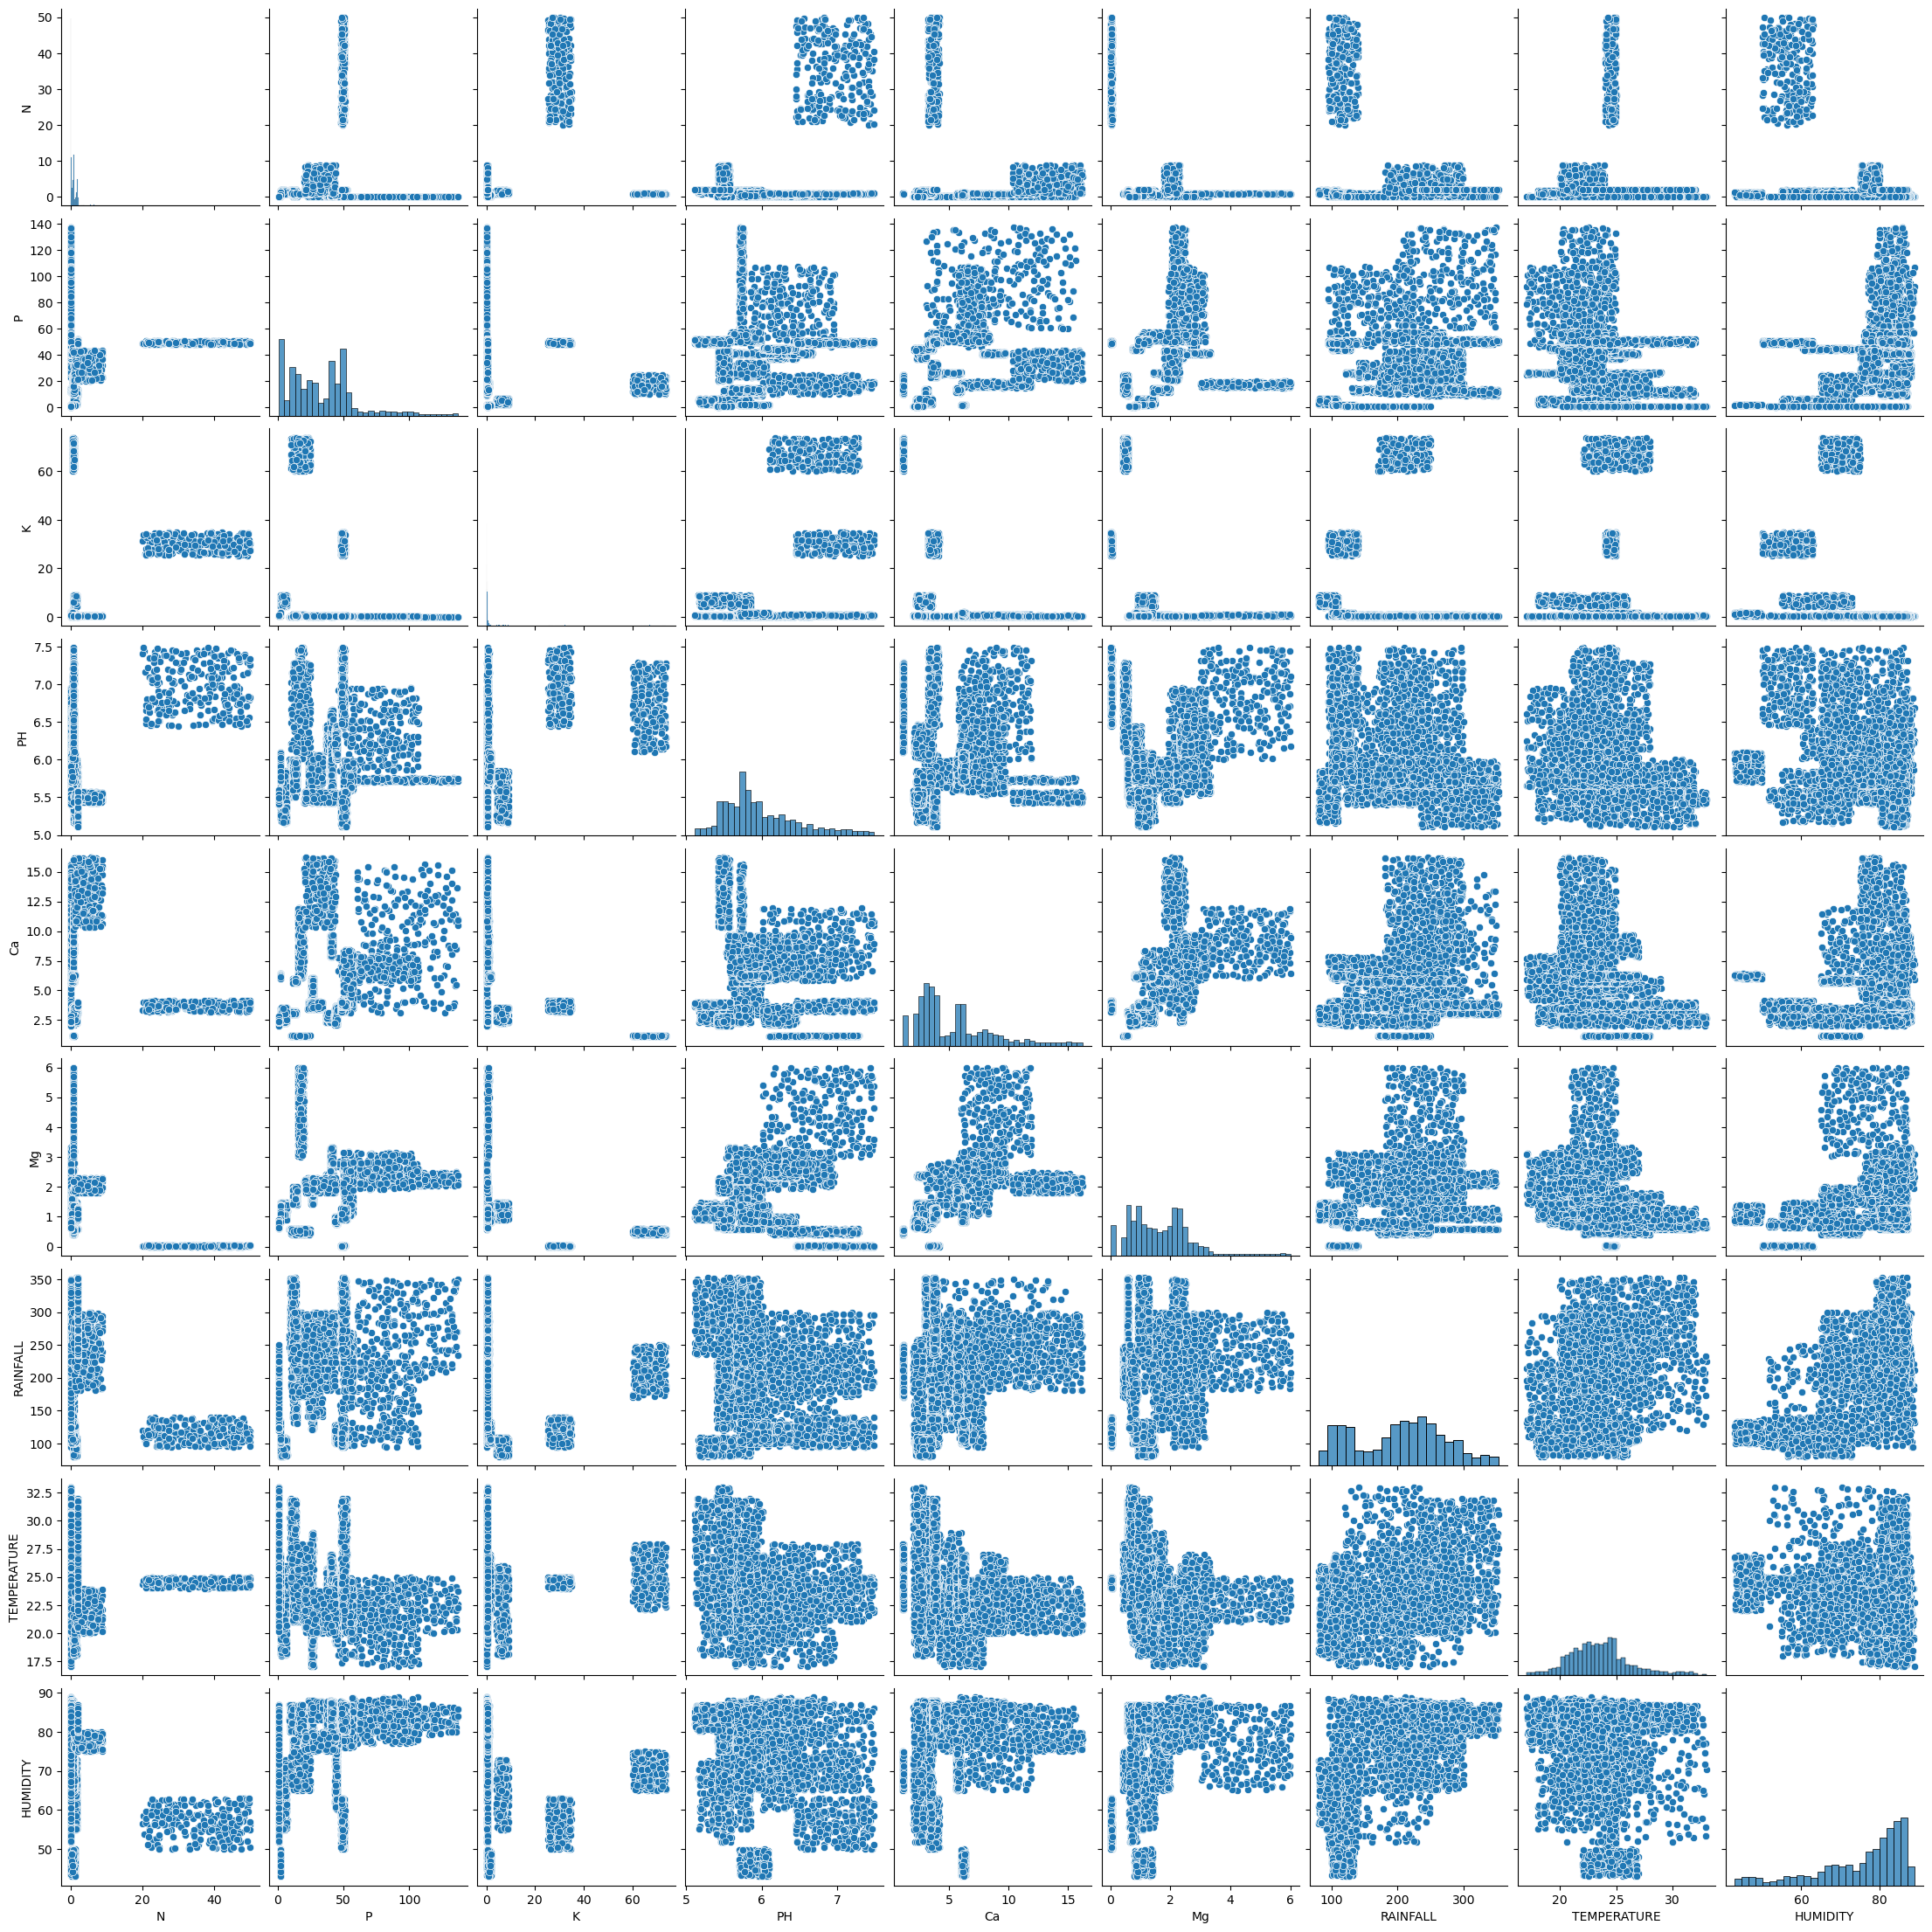

In [13]:
#Pairplot for Crop Recommendation Dataset
sns.pairplot(all_data)
print('Pairplot for Crop Recommendation Dataset')

Histplot in Crop Recommendation Dataset


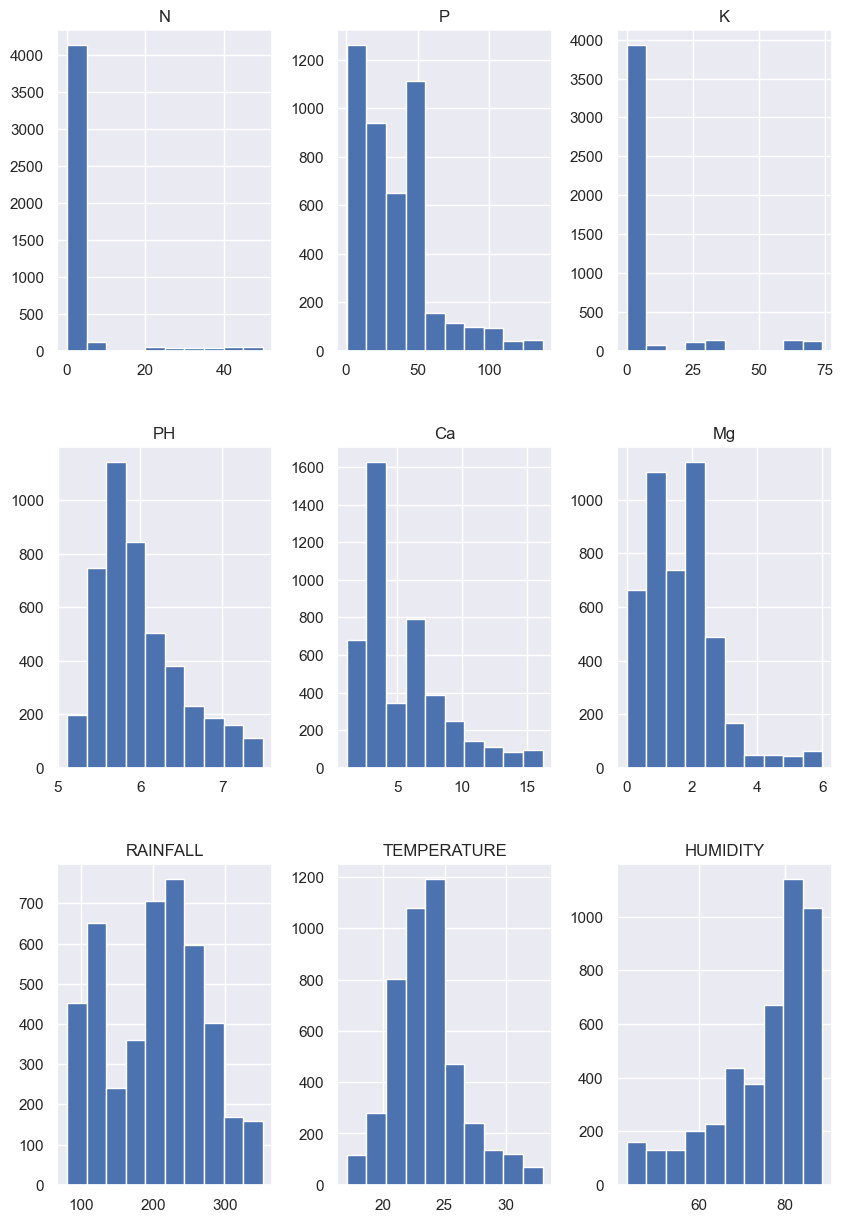

In [14]:
#Hide graph line
sns.set(style="darkgrid") 
all_data.hist(figsize=(10,15))
print('Histplot in Crop Recommendation Dataset')
plt.show()

In [15]:
plt.figure(figsize=(100,4))
fig = go.Figure()
fig.add_trace(go.Bar(
    x=all_data.index,
    y=all_data['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=all_data.index,
    y=all_data['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=all_data.index,
    y=all_data['K'],
    name='Potassium',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=all_data.index,
    y=all_data['Mg'],
    name='Magnessium',
    marker_color='salmon'
))
fig.add_trace(go.Bar(
    x=all_data.index,
    y=all_data['Ca'],
    name='Calcium',
    marker_color='red'
))

fig.update_layout(title="N, P, K, Ca, Mg values comparision between crops",
                  plot_bgcolor='black',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

<Figure size 10000x400 with 0 Axes>

Text(0.5, 1.0, 'Temperature vs Humidity of Crop Dataset')

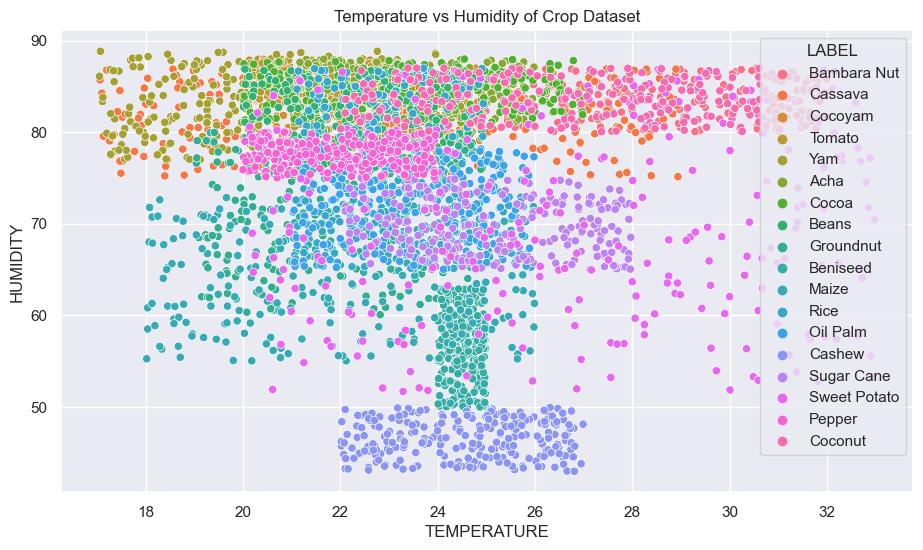

In [16]:
plt.figure(figsize=(11,6))
axis = sns.scatterplot(x='TEMPERATURE', y='HUMIDITY', data=all_data, hue='LABEL')
plt.title('Temperature vs Humidity of Crop Dataset')

Text(0.5, 1.0, 'Temperature vs Rainfall of Crop Dataset')

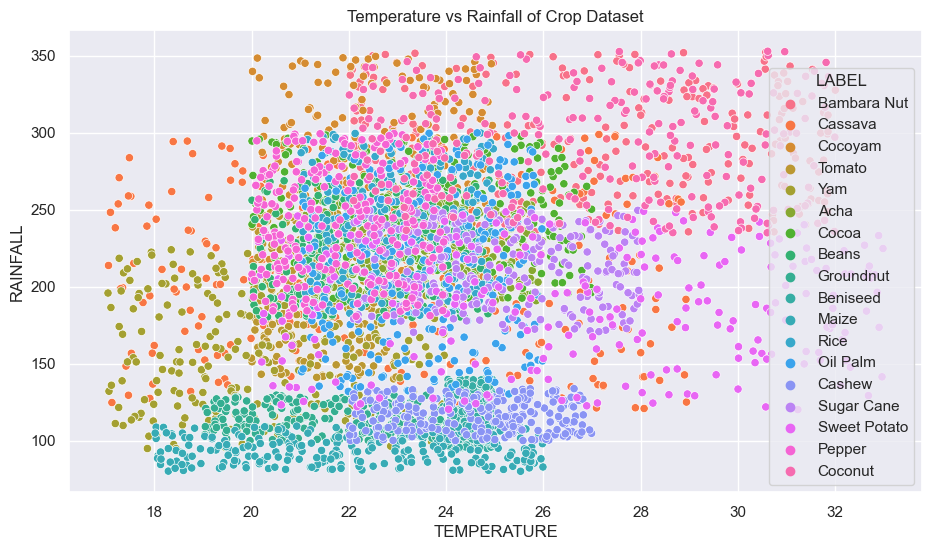

In [17]:
plt.figure(figsize=(11,6))
axis = sns.scatterplot(x='TEMPERATURE', y='RAINFALL', data=all_data, hue='LABEL')
plt.title('Temperature vs Rainfall of Crop Dataset')

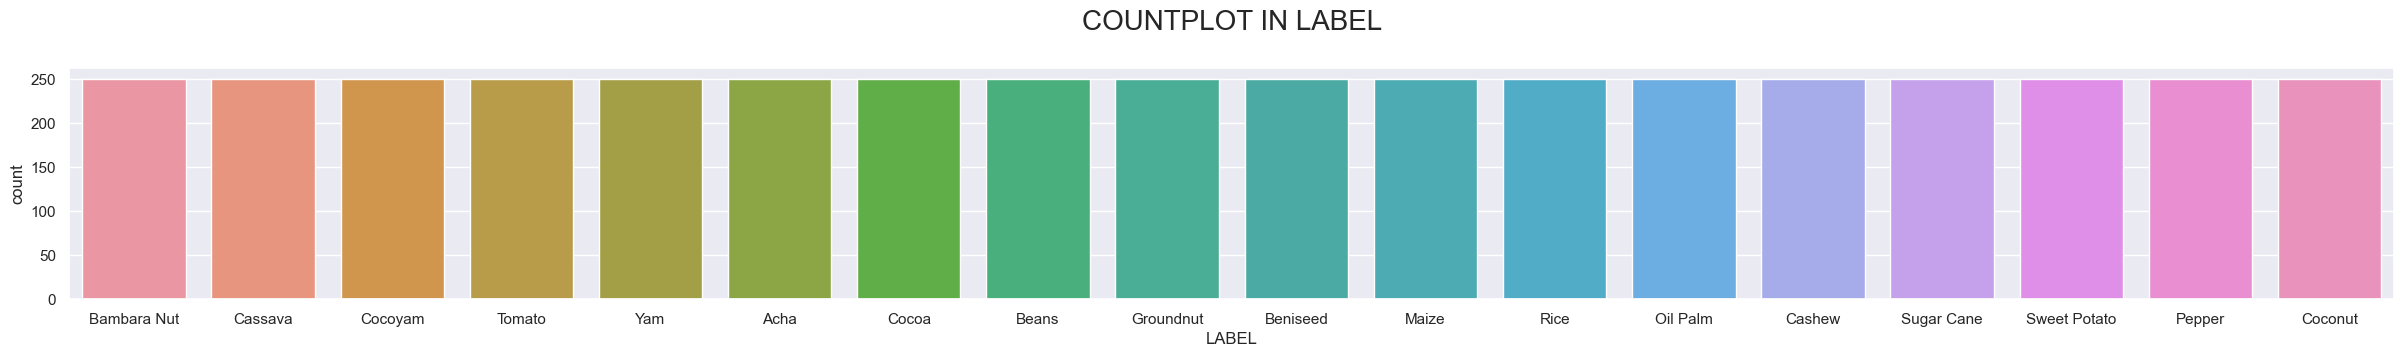

In [18]:
#Label
plt.figure(figsize=(30,3))
sns.countplot(x='LABEL', data=all_data)
title = 'CountPlot in label\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

In [19]:
crop_scatter = all_data[(all_data['LABEL']=='Rice') | 
                      (all_data['LABEL']=='Bambara nut') | 
                      (all_data['LABEL']=='Maize')|
                     (all_data['LABEL']=='Pepper') |
                     (all_data['LABEL']=='Cassava')]

fig = px.scatter(crop_scatter, x="TEMPERATURE", y="HUMIDITY", color="LABEL", symbol="LABEL")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Understanding the correlation between various features in the dataset

In [20]:
correlation = all_data.corr()

C:\Users\SYDNEY\AppData\Local\Temp\ipykernel_20600\191262137.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [21]:
print(correlation)

                    N         P         K        PH        Ca        Mg  \
N            1.000000  0.120897  0.342619  0.411280 -0.067909 -0.367587   
P            0.120897  1.000000 -0.104881  0.111802  0.288105  0.207578   
K            0.342619 -0.104881  1.000000  0.498585 -0.362984 -0.412839   
PH           0.411280  0.111802  0.498585  1.000000 -0.095234  0.133130   
Ca          -0.067909  0.288105 -0.362984 -0.095234  1.000000  0.559479   
Mg          -0.367587  0.207578 -0.412839  0.133130  0.559479  1.000000   
RAINFALL    -0.275616  0.189316 -0.141895 -0.213980  0.241395  0.278005   
TEMPERATURE  0.083968 -0.245533  0.147028 -0.093651 -0.260062 -0.328074   
HUMIDITY    -0.382550  0.397914 -0.305877 -0.177724  0.166793  0.432244   

             RAINFALL  TEMPERATURE  HUMIDITY  
N           -0.275616     0.083968 -0.382550  
P            0.189316    -0.245533  0.397914  
K           -0.141895     0.147028 -0.305877  
PH          -0.213980    -0.093651 -0.177724  
Ca           0

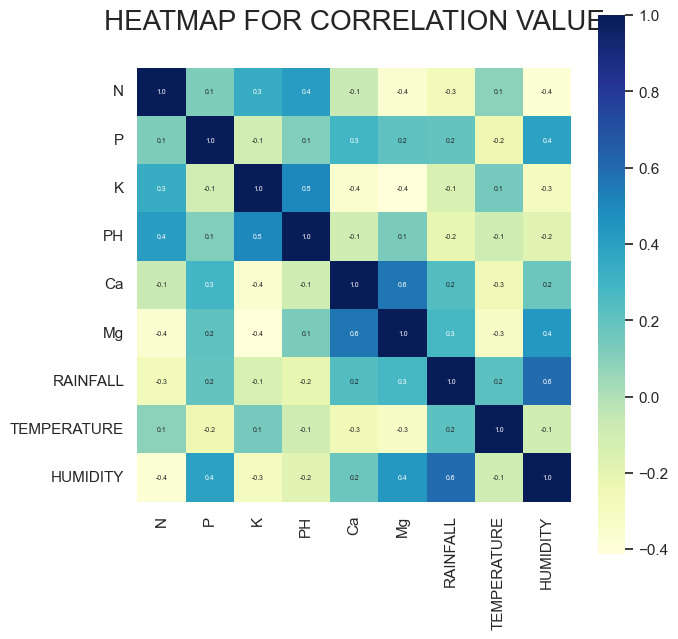

In [22]:
#Constructing a beatmap to understand the correlation
plt.figure(figsize=(7,7))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':5}, cmap='YlGnBu')
title = 'Heatmap for correlation value\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

List of various crops

In [23]:
print("Number of various crops: ", len(all_data['LABEL'].unique()))
print("List of crops: ", all_data['LABEL'].unique())

Number of various crops:  18
List of crops:  ['Bambara Nut' 'Cassava' 'Cocoyam' 'Tomato' 'Yam' 'Acha' 'Cocoa' 'Beans'
 'Groundnut' 'Beniseed' 'Maize' 'Rice' 'Oil Palm' 'Cashew' 'Sugar Cane'
 'Sweet Potato' 'Pepper' 'Coconut']


In [24]:
# Label column values
all_data['LABEL'].value_counts()

Bambara Nut     250
Cassava         250
Pepper          250
Sweet Potato    250
Sugar Cane      250
Cashew          250
Oil Palm        250
Rice            250
Maize           250
Beniseed        250
Groundnut       250
Beans           250
Cocoa           250
Acha            250
Yam             250
Tomato          250
Cocoyam         250
Coconut         250
Name: LABEL, dtype: int64

In [25]:
all_data.head()

N      P     K    PH    Ca    Mg  RAINFALL  TEMPERATURE  HUMIDITY  \
0  1.83  10.64  0.15  5.79  3.14  0.57    311.59        30.20     83.08   
1  1.91  11.59  0.15  5.84  3.04  0.58    240.58        27.14     83.25   
2  1.86   9.80  0.15  5.53  3.08  0.58    271.78        25.64     80.67   
3  1.80  13.81  0.16  5.62  3.07  0.60    330.54        29.39     80.08   
4  1.73  14.02  0.17  5.89  2.95  0.58    304.07        29.91     84.95   

         LABEL  
0  Bambara Nut  
1  Bambara Nut  
2  Bambara Nut  
3  Bambara Nut  
4  Bambara Nut

In [26]:
all_data.tail()

N      P     K    PH    Ca    Mg  RAINFALL  TEMPERATURE  HUMIDITY  \
4495  2.06  48.37  0.45  5.24  3.86  1.12    332.14        31.72     85.91   
4496  2.09  49.19  0.36  5.36  3.93  1.29    273.27        25.08     80.73   
4497  2.10  50.68  0.36  5.37  3.85  1.26    351.21        28.63     83.31   
4498  2.09  51.09  0.47  5.25  3.72  0.95    325.59        31.22     82.56   
4499  2.06  48.58  0.42  5.45  3.98  1.10    330.77        28.61     84.73   

        LABEL  
4495  Coconut  
4496  Coconut  
4497  Coconut  
4498  Coconut  
4499  Coconut

replace Label data with values

In [27]:
all_data.replace({'LABEL': {'Bambara Nut': 0, 'Cassava': 1, 'Cocoyam': 2, 'Tomato': 3, 'Yam': 4,
                                     'Acha': 5, 'Cocoa': 6, 'Beans': 7, 'Groundnut': 8, 'Beniseed': 9, 
                                     'Maize': 10, 'Rice': 11, 'Oil Palm': 12, 'Cashew': 13, 'Sugar Cane': 14, 
                                     'Sweet Potato': 15, 'Pepper': 16, 'Coconut': 17, 
                                     },}, inplace=True)

Label Encoding

In [28]:
# encoder = LabelEncoder()

In [29]:
#all_data['LABEL'] = encoder.fit_transform(all_data['LABEL'])

In [30]:
all_data.head()

N      P     K    PH    Ca    Mg  RAINFALL  TEMPERATURE  HUMIDITY  LABEL
0  1.83  10.64  0.15  5.79  3.14  0.57    311.59        30.20     83.08      0
1  1.91  11.59  0.15  5.84  3.04  0.58    240.58        27.14     83.25      0
2  1.86   9.80  0.15  5.53  3.08  0.58    271.78        25.64     80.67      0
3  1.80  13.81  0.16  5.62  3.07  0.60    330.54        29.39     80.08      0
4  1.73  14.02  0.17  5.89  2.95  0.58    304.07        29.91     84.95      0

In [31]:
all_data.tail()

N      P     K    PH    Ca    Mg  RAINFALL  TEMPERATURE  HUMIDITY  \
4495  2.06  48.37  0.45  5.24  3.86  1.12    332.14        31.72     85.91   
4496  2.09  49.19  0.36  5.36  3.93  1.29    273.27        25.08     80.73   
4497  2.10  50.68  0.36  5.37  3.85  1.26    351.21        28.63     83.31   
4498  2.09  51.09  0.47  5.25  3.72  0.95    325.59        31.22     82.56   
4499  2.06  48.58  0.42  5.45  3.98  1.10    330.77        28.61     84.73   

      LABEL  
4495     17  
4496     17  
4497     17  
4498     17  
4499     17

In [32]:
# Label column values after level encoding
all_data['LABEL'].value_counts()

0     250
1     250
16    250
15    250
14    250
13    250
12    250
11    250
10    250
9     250
8     250
7     250
6     250
5     250
4     250
3     250
2     250
17    250
Name: LABEL, dtype: int64

In [33]:
print(all_data)

         N      P     K    PH    Ca    Mg  RAINFALL  TEMPERATURE  HUMIDITY  \
0     1.83  10.64  0.15  5.79  3.14  0.57    311.59        30.20     83.08   
1     1.91  11.59  0.15  5.84  3.04  0.58    240.58        27.14     83.25   
2     1.86   9.80  0.15  5.53  3.08  0.58    271.78        25.64     80.67   
3     1.80  13.81  0.16  5.62  3.07  0.60    330.54        29.39     80.08   
4     1.73  14.02  0.17  5.89  2.95  0.58    304.07        29.91     84.95   
...    ...    ...   ...   ...   ...   ...       ...          ...       ...   
4495  2.06  48.37  0.45  5.24  3.86  1.12    332.14        31.72     85.91   
4496  2.09  49.19  0.36  5.36  3.93  1.29    273.27        25.08     80.73   
4497  2.10  50.68  0.36  5.37  3.85  1.26    351.21        28.63     83.31   
4498  2.09  51.09  0.47  5.25  3.72  0.95    325.59        31.22     82.56   
4499  2.06  48.58  0.42  5.45  3.98  1.10    330.77        28.61     84.73   

      LABEL  
0         0  
1         0  
2         0  
3      

Splitting the data set

In [34]:
X = all_data.drop(['LABEL'], axis=1)
Y = all_data['LABEL']

In [35]:
print(X)

         N      P     K    PH    Ca    Mg  RAINFALL  TEMPERATURE  HUMIDITY
0     1.83  10.64  0.15  5.79  3.14  0.57    311.59        30.20     83.08
1     1.91  11.59  0.15  5.84  3.04  0.58    240.58        27.14     83.25
2     1.86   9.80  0.15  5.53  3.08  0.58    271.78        25.64     80.67
3     1.80  13.81  0.16  5.62  3.07  0.60    330.54        29.39     80.08
4     1.73  14.02  0.17  5.89  2.95  0.58    304.07        29.91     84.95
...    ...    ...   ...   ...   ...   ...       ...          ...       ...
4495  2.06  48.37  0.45  5.24  3.86  1.12    332.14        31.72     85.91
4496  2.09  49.19  0.36  5.36  3.93  1.29    273.27        25.08     80.73
4497  2.10  50.68  0.36  5.37  3.85  1.26    351.21        28.63     83.31
4498  2.09  51.09  0.47  5.25  3.72  0.95    325.59        31.22     82.56
4499  2.06  48.58  0.42  5.45  3.98  1.10    330.77        28.61     84.73

[4500 rows x 9 columns]


In [36]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
4495    17
4496    17
4497    17
4498    17
4499    17
Name: LABEL, Length: 4500, dtype: int64


Splitting the data into Training data & Testing Data

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(4500, 9) (3150, 9) (1350, 9)


Machine Learning Model Training

Random Forest

In [39]:
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
clf_params = {'n_estimators': [100, 200, 300],
             'max_depth': [None, 10, 20]}
clf_grid = GridSearchCV(clf, clf_params, cv=5)
clf_grid.fit(X_train, Y_train)
clf_best = clf_grid.best_estimator_
clf_pred = clf_best.predict(X_test)
clf_accuracy = accuracy_score(Y_test, clf_pred)

Train Data

In [40]:
random_forest_text_predictions = clf.predict(X_train)
# print('Confusion matrix : \n', confusion_matrix(Y_test,random_forest_text_predictions),'\n')
print('Accuracy Score : ', accuracy_score(Y_train,random_forest_text_predictions)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_train,random_forest_text_predictions))

Accuracy Score :  100.0 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       166
           2       1.00      1.00      1.00       185
           3       1.00      1.00      1.00       180
           4       1.00      1.00      1.00       157
           5       1.00      1.00      1.00       170
           6       1.00      1.00      1.00       173
           7       1.00      1.00      1.00       180
           8       1.00      1.00      1.00       178
           9       1.00      1.00      1.00       173
          10       1.00      1.00      1.00       168
          11       1.00      1.00      1.00       178
          12       1.00      1.00      1.00       189
          13       1.00      1.00      1.00       188
          14       1.00      1.00      1.00       171
          15       1.00      1.00      1.00       178
          16       1.00      1

Test data

In [41]:
random_forest_text_predictions = clf.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,random_forest_text_predictions),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,random_forest_text_predictions)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,random_forest_text_predictions))

Accuracy Score :  99.85185185185185 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        70
           4       1.00      0.98      0.99        93
           5       1.00      1.00      1.00        80
           6       1.00      1.00      1.00        77
           7       0.97      1.00      0.99        70
           8       1.00      1.00      1.00        72
           9       1.00      1.00      1.00        77
          10       1.00      1.00      1.00        82
          11       1.00      1.00      1.00        72
          12       1.00      1.00      1.00        61
          13       1.00      1.00      1.00        62
          14       1.00      1.00      1.00        79
          15       1.00      1.00      1.00        72
          16      

In [42]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, random_forest_text_predictions))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, random_forest_text_predictions))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, random_forest_text_predictions))))

Mean_absolute_error:  0.0044444444444444444
Mean_squared_error:  0.013333333333333334
Root mean_squared_error:  0.11547005383792516


Checking Actual Crop Name and Predicted Crop Name

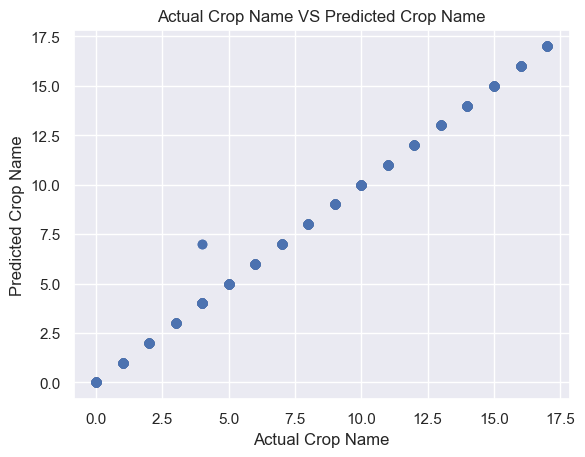

In [43]:
plt.scatter(Y_test, random_forest_text_predictions)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

GaussianNB

In [44]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(Y_test, gnb_pred)

In [45]:
gnb_pred = gnb.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,gnb_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,gnb_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,gnb_pred))

Accuracy Score :  99.77777777777777 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        70
           4       1.00      0.97      0.98        93
           5       1.00      1.00      1.00        80
           6       1.00      1.00      1.00        77
           7       0.96      1.00      0.98        70
           8       1.00      1.00      1.00        72
           9       1.00      1.00      1.00        77
          10       1.00      1.00      1.00        82
          11       1.00      1.00      1.00        72
          12       1.00      1.00      1.00        61
          13       1.00      1.00      1.00        62
          14       1.00      1.00      1.00        79
          15       1.00      1.00      1.00        72
          16      

In [46]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, gnb_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, gnb_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, gnb_pred))))

Mean_absolute_error:  0.006666666666666667
Mean_squared_error:  0.02
Root mean_squared_error:  0.1414213562373095


Checking Actual Crop Name and Predicted Crop Name

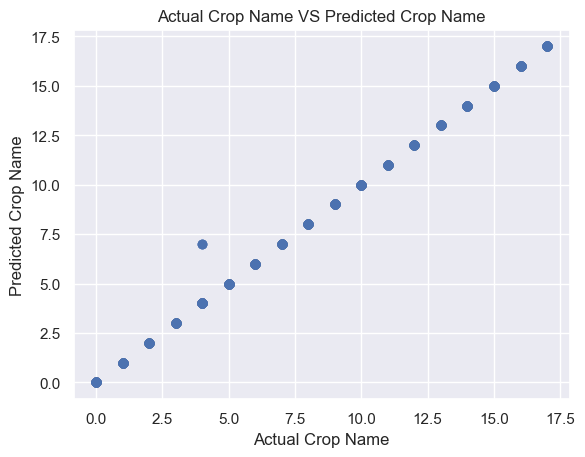

In [47]:
plt.scatter(Y_test, gnb_pred)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_params = {'n_neighbors': [3, 5, 7]}
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train, Y_train)
knn_best = knn_grid.best_estimator_
knn_pred = knn_best.predict(X_test)
knn_accuracy = accuracy_score(Y_test, knn_pred)

In [49]:
knn_pred = knn.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,knn_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,knn_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,knn_pred))

Accuracy Score :  96.14814814814815 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       0.96      0.79      0.86        84
           2       0.89      0.91      0.90        65
           3       0.79      0.96      0.86        70
           4       0.94      0.84      0.89        93
           5       1.00      1.00      1.00        80
           6       0.97      1.00      0.99        77
           7       0.88      1.00      0.93        70
           8       1.00      1.00      1.00        72
           9       1.00      1.00      1.00        77
          10       1.00      1.00      1.00        82
          11       0.99      0.92      0.95        72
          12       0.91      1.00      0.95        61
          13       1.00      1.00      1.00        62
          14       1.00      1.00      1.00        79
          15       1.00      1.00      1.00        72
          16      

In [50]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, knn_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, knn_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, knn_pred))))

Mean_absolute_error:  0.10074074074074074
Mean_squared_error:  0.4148148148148148
Root mean_squared_error:  0.6440611887195306


Checking Actual Crop Name and Predicted Crop Name

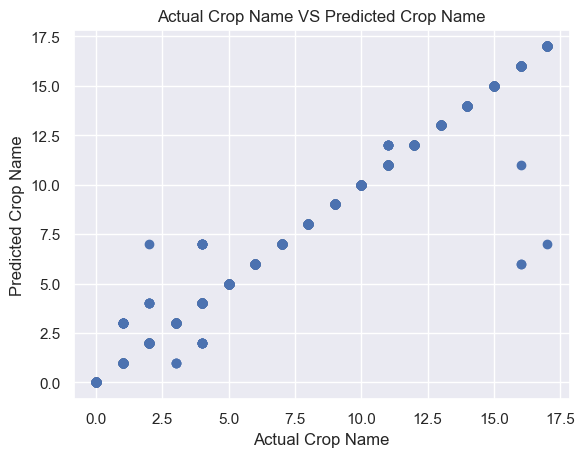

In [51]:
plt.scatter(Y_test, knn_pred)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

Support Vector Clustering (SVC)

In [52]:
svc = SVC()
svc.fit(X_train, Y_train)
svc_params = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf']}
svc_grid = GridSearchCV(svc, svc_params, cv=5)
svc_grid.fit(X_train, Y_train)
svc_best = svc_grid.best_estimator_
svc_pred = svc_best.predict(X_test)
svc_accuracy = accuracy_score(Y_test, svc_pred)

In [53]:
svc_pred = svc.predict(X_test)
# print('Confusion matrix : \n', confusion_matrix(Y_test,svc_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,svc_pred)*100,'\n')
print("Classification Report:", "\n", classification_report(Y_test,svc_pred))

Accuracy Score :  78.07407407407408 

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.94      0.81        80
           1       0.00      0.00      0.00        84
           2       0.83      0.85      0.84        65
           3       0.55      0.84      0.67        70
           4       0.98      0.68      0.80        93
           5       0.59      0.86      0.70        80
           6       0.56      0.48      0.52        77
           7       0.69      0.97      0.81        70
           8       0.92      1.00      0.96        72
           9       1.00      1.00      1.00        77
          10       1.00      1.00      1.00        82
          11       0.43      0.68      0.52        72
          12       0.83      0.66      0.73        61
          13       0.91      1.00      0.95        62
          14       1.00      1.00      1.00        79
          15       1.00      0.90      0.95        72
          16      

C:\Users\SYDNEY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\SYDNEY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\SYDNEY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [54]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, svc_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, svc_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, svc_pred))))

Mean_absolute_error:  1.0540740740740742
Mean_squared_error:  8.891111111111112
Root mean_squared_error:  2.981796624706506


Checking Actual Crop Name and Predicted Crop Name

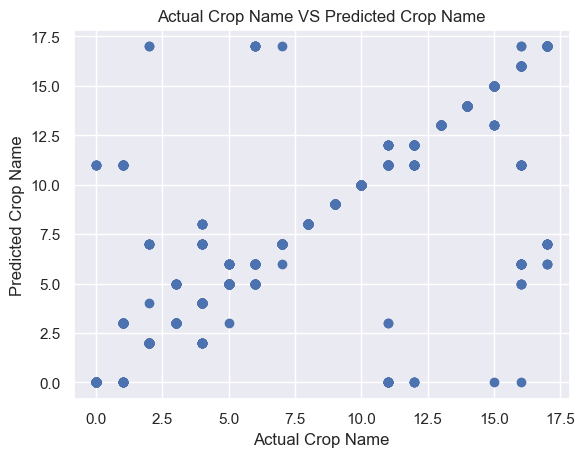

In [55]:
plt.scatter(Y_test, svc_pred)
plt.xlabel('Actual Crop Name')
plt.ylabel('Predicted Crop Name')
plt.title('Actual Crop Name VS Predicted Crop Name')
plt.show()

In [56]:
print('Accuracy Score : ', accuracy_score(Y_test,random_forest_text_predictions)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,gnb_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,knn_pred)*100,'\n')

print('Accuracy Score : ', accuracy_score(Y_test,svc_pred)*100,'\n')

Accuracy Score :  99.85185185185185 

Accuracy Score :  99.77777777777777 

Accuracy Score :  96.14814814814815 

Accuracy Score :  78.07407407407408 



In [57]:
from sklearn import svm,model_selection, neighbors, naive_bayes, ensemble, discriminant_analysis

In [58]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [60]:
MLA = [
    #Ensemble Methods
    ensemble.RandomForestClassifier(),

    #Navies Bayes
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    
    ]

In [61]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    # fp, tp, th  = roc_curve(Y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, Y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, Y_test), 4)
    # MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(Y_test, predicted)
    # MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(Y_test, predicted)
    # MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)

    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

MLA Name  MLA Train Accuracy  MLA Test Accuracy
0  RandomForestClassifier              1.0000             0.9985
1              GaussianNB              0.9990             0.9978
2    KNeighborsClassifier              0.9775             0.9615
3                     SVC              0.7702             0.7807

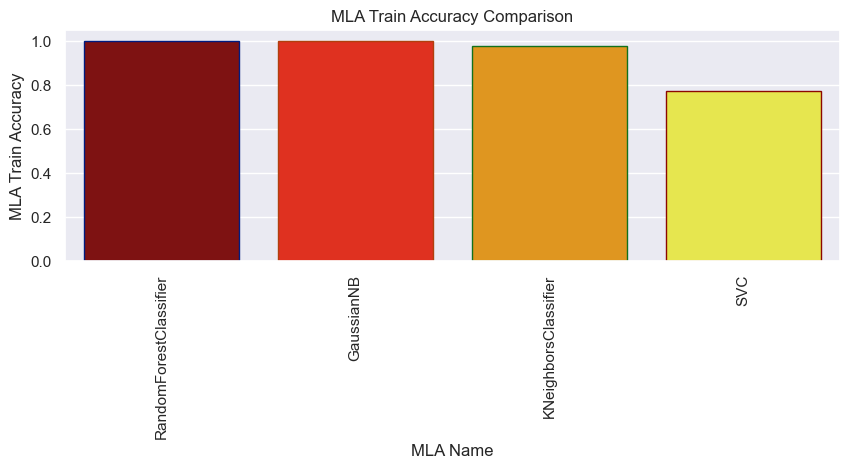

In [62]:
plt.subplots(figsize=(10,3))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

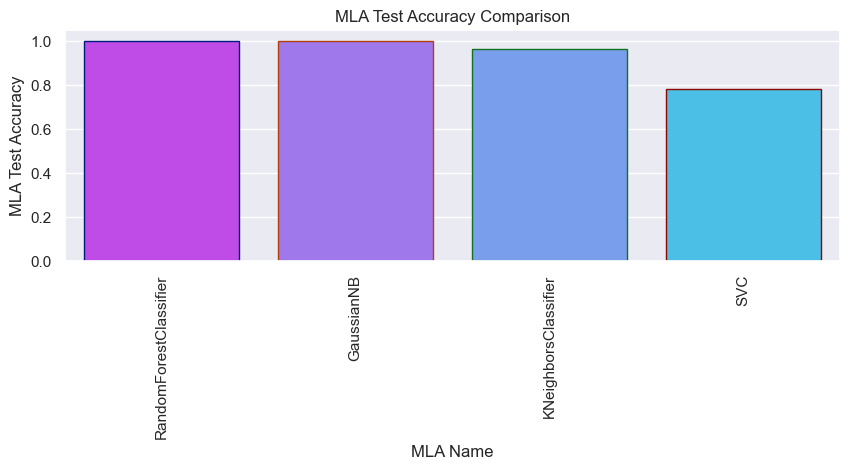

In [63]:
plt.subplots(figsize=(10,3))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='cool_r',edgecolor=sns.color_palette("dark", 8))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()